In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = './tmp/catdog'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# print(train_dir)
# 训练集
train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train_dir, 'dog')

# 验证集
validation_cats_dir = os.path.join(validation_dir, 'cat')
validation_dogs_dir = os.path.join(validation_dir, 'dog')

In [10]:
model = tf.keras.models.Sequential([
    # 如果训练慢，可以把数据设置的更小一些
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    # 池化就是压缩,把大的拿出来，不需要训练参数
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 为全连接层准备
    tf.keras.layers.Flatten(),
    
    # 从结果看，FC全连接层param很大，很容易出现过拟合
    tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.2),
    # 二分类sigmoid就够了
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=1e-4),
             metrics=['acc'])

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # 文件夹路径
    target_size=(64,64), # 指定resize成的大小
    batch_size = 20,
    # 如果one-hot就是categorical，二分类用binary就可以
    class_mode='binary')

validate_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary')

Found 20 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=5, # 2000 images  = batch_size * steps
    epochs=5,
    validation_data=validate_generator,
    validation_steps=5, # 1000 images = batch_size * steps
    verbose =2
    
)

Epoch 1/5
1/5 - 0s - loss: 0.7012 - acc: 0.5000 - val_loss: 0.6846 - val_acc: 1.0000


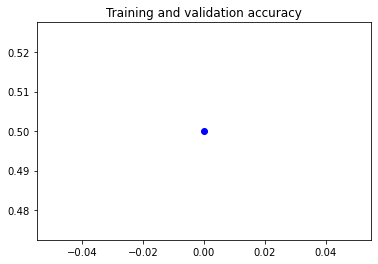

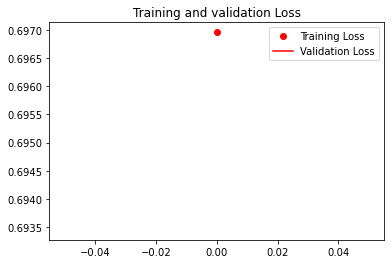

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')

plt.legend()
plt.show()